In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
#Resampling-Methode
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import f1_score as fs
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

# Datensätzen einlesen

In [73]:
demo=pd.read_csv(r'C:\Users\Emad\Desktop\Studium\masterprojekt\datenbank\kaggle_de_03-01-2021\12.01\archive (24)\demographics_de.csv')
df =pd.read_csv(r'C:\Users\Emad\Desktop\Studium\masterprojekt\datenbank\kaggle_de_03-01-2021\12.01\archive (24)\covid_de.csv')

# Analyse der Datensätze

In [74]:
df.shape

(505230, 8)

In [75]:
n_dataframe,m_dataframe=df.shape
print('Der gesamte Datensatz von Deutschland (letzte Aktaulisierung am 16.01.2021)')
print('Anzahl der features (Spalten) (m): %.0f'%(m_dataframe))
print('Anzahl der Proben (Zeilen) (n): %.0f'%(n_dataframe))
cnt = 0
print('\nFeatures (Spalten): ')
for feature in df.columns:
    cnt += 1
    print('%d. '%(cnt), feature,'\t\t')

Der gesamte Datensatz von Deutschland (letzte Aktaulisierung am 16.01.2021)
Anzahl der features (Spalten) (m): 8
Anzahl der Proben (Zeilen) (n): 505230

Features (Spalten): 
1.  state 		
2.  county 		
3.  age_group 		
4.  gender 		
5.  date 		
6.  cases 		
7.  deaths 		
8.  recovered 		


In [123]:
df

,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-22,1,0,1
...,...,...,...,...,...,...,...,...
505225,Thueringen,SK Weimar,80-99,M,2021-01-23,1,0,0
505226,Thueringen,SK Weimar,80-99,M,2021-01-24,1,0,0
505227,Thueringen,SK Weimar,80-99,M,2021-01-26,1,0,0
505228,Thueringen,SK Weimar,80-99,M,2021-01-27,1,0,0


# Untersuchung ob dataframe fehlende Werte enthielt

In [6]:
df.isnull().sum()

state            0
county           0
age_group     2581
gender       11411
date             0
cases            0
deaths           0
recovered        0
dtype: int64

# Es wird neue Spalten zu Daten hinzugefügt wie Bevölkerungsdichte füe die Bündesländer und Stadtkreise

In [76]:
# Es wird neue Spalten zu Daten hinzugefügt bzw. Bevölkerungsdichte füe die Landkreise und Stadtkreise
conditions = [
    (df['county']=='LK Alb-Donau-Kreis'),
(df['county']=='LK Biberach'),
(df['county']=='LK Bodenseekreis'),
(df['county']=='LK Boeblingen'),
(df['county']=='LK Breisgau-Hochschwarzwald'),
(df['county']=='LK Calw'),
(df['county']=='LK Emmendingen'),
(df['county']=='LK Enzkreis'),
(df['county']=='LK Esslingen'),
(df['county']=='LK Freudenstadt'),
(df['county']=='LK Goeppingen'),
(df['county']=='LK Heidenheim'),
(df['county']=='LK Heilbronn'),
(df['county']=='LK Hohenlohekreis'),
(df['county']=='LK Karlsruhe'),
(df['county']=='LK Konstanz'),
(df['county']=='LK Loerrach'),
(df['county']=='LK Ludwigsburg'),
(df['county']=='LK Main-Tauber-Kreis'),
(df['county']=='LK Neckar-Odenwald-Kreis'),
(df['county']=='LK Ortenaukreis'),
(df['county']=='LK Ostalbkreis'),
(df['county']=='LK Rastatt'),
(df['county']=='LK Ravensburg'),
(df['county']=='LK Rems-Murr-Kreis'),
(df['county']=='LK Reutlingen'),
(df['county']=='LK Rhein-Neckar-Kreis'),
(df['county']=='LK Rottweil'),
(df['county']=='LK Schwaebisch Hall'),
(df['county']=='LK Schwarzwald-Baar-Kreis'),
(df['county']=='LK Sigmaringen'),
(df['county']=='LK Tuebingen'),
(df['county']=='LK Tuttlingen'),
(df['county']=='LK Waldshut'),
(df['county']=='LK Zollernalbkreis'),
(df['county']=='SK Baden-Baden'),
(df['county']=='SK Freiburg i.Breisgau'),
(df['county']=='SK Heidelberg'),
(df['county']=='SK Heilbronn'),
(df['county']=='SK Karlsruhe'),
(df['county']=='SK Mannheim'),
(df['county']=='SK Pforzheim'),
(df['county']=='SK Stuttgart'),
(df['county']=='SK Ulm'),
(df['county']=='LK Aichach-Friedberg'),
(df['county']=='LK Altoetting'),
(df['county']=='LK Amberg-Sulzbach'),
(df['county']=='LK Ansbach'),
(df['county']=='LK Aschaffenburg'),
(df['county']=='LK Augsburg'),
(df['county']=='LK Bad Kissingen'),
(df['county']=='LK Bad Toelz-Wolfratshausen'),
(df['county']=='LK Bamberg'),
(df['county']=='LK Bayreuth'),
(df['county']=='LK Berchtesgadener Land'),
(df['county']=='LK Cham'),
(df['county']=='LK Coburg'),
(df['county']=='LK Dachau'),
(df['county']=='LK Deggendorf'),
(df['county']=='LK Dillingen a.d.Donau'),
(df['county']=='LK Dingolfing-Landau'),
(df['county']=='LK Donau-Ries'),
(df['county']=='LK Ebersberg'),
(df['county']=='LK Eichstaett'),
(df['county']=='LK Erding'),
(df['county']=='LK Erlangen-Hoechstadt'),
(df['county']=='LK Forchheim'),
(df['county']=='LK Freising'),
(df['county']=='LK Freyung-Grafenau'),
(df['county']=='LK Fuerstenfeldbruck'),
(df['county']=='LK Fuerth'),
(df['county']=='LK Garmisch-Partenkirchen'),
(df['county']=='LK Guenzburg'),
(df['county']=='LK Hassberge'),
(df['county']=='LK Hof'),
(df['county']=='LK Kelheim'),
(df['county']=='LK Kitzingen'),
(df['county']=='LK Kronach'),
(df['county']=='LK Kulmbach'),
(df['county']=='LK Landsberg a.Lech'),
(df['county']=='LK Landshut'),
(df['county']=='LK Lichtenfels'),
(df['county']=='LK Lindau'),
(df['county']=='LK Main-Spessart'),
(df['county']=='LK Miesbach'),
(df['county']=='LK Miltenberg'),
(df['county']=='LK Muehldorf a.Inn'),
(df['county']=='LK Muenchen'),
(df['county']=='LK Neu-Ulm'),
(df['county']=='LK Neuburg-Schrobenhausen'),
(df['county']=='LK Neumarkt i.d.OPf.'),
(df['county']=='LK Neustadt a.d.Aisch-Bad Windsheim'),
(df['county']=='LK Neustadt a.d.Waldnaab'),
(df['county']=='LK Nuernberger Land'),
(df['county']=='LK Oberallgaeu'),
(df['county']=='LK Ostallgaeu'),
(df['county']=='LK Passau'),
(df['county']=='LK Pfaffenhofen a.d.Ilm'),
(df['county']=='LK Regen'),
(df['county']=='LK Regensburg'),
(df['county']=='LK Rhoen-Grabfeld'),
(df['county']=='LK Rosenheim'),
(df['county']=='LK Roth'),
(df['county']=='LK Rottal-Inn'),
(df['county']=='LK Schwandorf'),
(df['county']=='LK Schweinfurt'),
(df['county']=='LK Starnberg'),
(df['county']=='LK Straubing-Bogen'),
(df['county']=='LK Tirschenreuth'),
(df['county']=='LK Traunstein'),
(df['county']=='LK Unterallgaeu'),
(df['county']=='LK Weilheim-Schongau'),
(df['county']=='LK Weissenburg-Gunzenhausen'),
(df['county']=='LK Wuerzburg'),
(df['county']=='LK Wunsiedel i.Fichtelgebirge'),
(df['county']=='SK Amberg'),
(df['county']=='SK Ansbach'),
(df['county']=='SK Aschaffenburg'),
(df['county']=='SK Augsburg'),
(df['county']=='SK Bamberg'),
(df['county']=='SK Bayreuth'),
(df['county']=='SK Coburg'),
(df['county']=='SK Erlangen'),
(df['county']=='SK Fuerth'),
(df['county']=='SK Hof'),
(df['county']=='SK Ingolstadt'),
(df['county']=='SK Kaufbeuren'),
(df['county']=='SK Kempten'),
(df['county']=='SK Landshut'),
(df['county']=='SK Memmingen'),
(df['county']=='SK Muenchen'),
(df['county']=='SK Nuernberg'),
(df['county']=='SK Passau'),
(df['county']=='SK Regensburg'),
(df['county']=='SK Rosenheim'),
(df['county']=='SK Schwabach'),
(df['county']=='SK Schweinfurt'),
(df['county']=='SK Straubing'),
(df['county']=='SK Weiden i.d.OPf.'),
(df['county']=='SK Wuerzburg'),
(df['county']=='SK Berlin Charlottenburg-Wilmersdorf'),
(df['county']=='SK Berlin Friedrichshain-Kreuzberg'),
(df['county']=='SK Berlin Lichtenberg'),
(df['county']=='SK Berlin Marzahn-Hellersdorf'),
(df['county']=='SK Berlin Mitte'),
(df['county']=='SK Berlin Neukoelln'),
(df['county']=='SK Berlin Pankow'),
(df['county']=='SK Berlin Reinickendorf'),
(df['county']=='SK Berlin Spandau'),
(df['county']=='SK Berlin Steglitz-Zehlendorf'),
(df['county']=='SK Berlin Tempelhof-Schoeneberg'),
(df['county']=='SK Berlin Treptow-Koepenick'),
(df['county']=='LK Barnim'),
(df['county']=='LK Dahme-Spreewald'),
(df['county']=='LK Elbe-Elster'),
(df['county']=='LK Havelland'),
(df['county']=='LK Maerkisch-Oderland'),
(df['county']=='LK Oberhavel'),
(df['county']=='LK Oberspreewald-Lausitz'),
(df['county']=='LK Oder-Spree'),
(df['county']=='LK Ostprignitz-Ruppin'),
(df['county']=='LK Potsdam-Mittelmark'),
(df['county']=='LK Prignitz'),
(df['county']=='LK Spree-Neisse'),
(df['county']=='LK Teltow-Flaeming'),
(df['county']=='LK Uckermark'),
(df['county']=='SK Brandenburg a.d.Havel'),
(df['county']=='SK Cottbus'),
(df['county']=='SK Frankfurt (Oder)'),
(df['county']=='SK Potsdam'),
(df['county']=='SK Bremen'),
(df['county']=='SK Bremerhaven'),
(df['county']=='SK Hamburg'),
(df['county']=='LK Bergstrasse'),
(df['county']=='LK Darmstadt-Dieburg'),
(df['county']=='LK Fulda'),
(df['county']=='LK Giessen'),
(df['county']=='LK Gross-Gerau'),
(df['county']=='LK Hersfeld-Rotenburg'),
(df['county']=='LK Hochtaunuskreis'),
(df['county']=='LK Kassel'),
(df['county']=='LK Lahn-Dill-Kreis'),
(df['county']=='LK Limburg-Weilburg'),
(df['county']=='LK Main-Kinzig-Kreis'),
(df['county']=='LK Main-Taunus-Kreis'),
(df['county']=='LK Marburg-Biedenkopf'),
(df['county']=='LK Odenwaldkreis'),
(df['county']=='LK Offenbach'),
(df['county']=='LK Rheingau-Taunus-Kreis'),
(df['county']=='LK Schwalm-Eder-Kreis'),
(df['county']=='LK Vogelsbergkreis'),
(df['county']=='LK Waldeck-Frankenberg'),
(df['county']=='LK Werra-Meissner-Kreis'),
(df['county']=='LK Wetteraukreis'),
(df['county']=='SK Darmstadt'),
(df['county']=='SK Frankfurt am Main'),
(df['county']=='SK Kassel'),
(df['county']=='SK Offenbach'),
(df['county']=='SK Wiesbaden'),
(df['county']=='LK Ludwigslust-Parchim'),
(df['county']=='LK Mecklenburgische Seenplatte'),
(df['county']=='LK Nordwestmecklenburg'),
(df['county']=='LK Rostock'),
(df['county']=='LK Vorpommern-Greifswald'),
(df['county']=='LK Vorpommern-Ruegen'),
(df['county']=='SK Rostock'),
(df['county']=='SK Schwerin'),
(df['county']=='LK Ammerland'),
(df['county']=='LK Aurich'),
(df['county']=='LK Celle'),
(df['county']=='LK Cloppenburg'),
(df['county']=='LK Cuxhaven'),
(df['county']=='LK Diepholz'),
(df['county']=='LK Emsland'),
(df['county']=='LK Friesland'),
(df['county']=='LK Gifhorn'),
(df['county']=='LK Goettingen'),
(df['county']=='LK Goslar'),
(df['county']=='LK Grafschaft Bentheim'),
(df['county']=='LK Hameln-Pyrmont'),
(df['county']=='LK Harburg'),
(df['county']=='LK Heidekreis'),
(df['county']=='LK Helmstedt'),
(df['county']=='LK Hildesheim'),
(df['county']=='LK Holzminden'),
(df['county']=='LK Leer'),
(df['county']=='LK Luechow-Dannenberg'),
(df['county']=='LK Lueneburg'),
(df['county']=='LK Nienburg (Weser)'),
(df['county']=='LK Northeim'),
(df['county']=='LK Oldenburg'),
(df['county']=='LK Osnabrueck'),
(df['county']=='LK Osterholz'),
(df['county']=='LK Peine'),
(df['county']=='LK Rotenburg (Wuemme)'),
(df['county']=='LK Schaumburg'),
(df['county']=='LK Stade'),
(df['county']=='LK Uelzen'),
(df['county']=='LK Vechta'),
(df['county']=='LK Verden'),
(df['county']=='LK Wesermarsch'),
(df['county']=='LK Wittmund'),
(df['county']=='LK Wolfenbuettel'),
(df['county']=='Region Hannover'),
(df['county']=='SK Braunschweig'),
(df['county']=='SK Delmenhorst'),
(df['county']=='SK Emden'),
(df['county']=='SK Oldenburg'),
(df['county']=='SK Osnabrueck'),
(df['county']=='SK Salzgitter'),
(df['county']=='SK Wilhelmshaven'),
(df['county']=='SK Wolfsburg'),
(df['county']=='LK Borken'),
(df['county']=='LK Coesfeld'),
(df['county']=='LK Dueren'),
(df['county']=='LK Ennepe-Ruhr-Kreis'),
(df['county']=='LK Euskirchen'),
(df['county']=='LK Guetersloh'),
(df['county']=='LK Heinsberg'),
(df['county']=='LK Herford'),
(df['county']=='LK Hochsauerlandkreis'),
(df['county']=='LK Hoexter'),
(df['county']=='LK Kleve'),
(df['county']=='LK Lippe'),
(df['county']=='LK Maerkischer Kreis'),
(df['county']=='LK Mettmann'),
(df['county']=='LK Minden-Luebbecke'),
(df['county']=='LK Oberbergischer Kreis'),
(df['county']=='LK Olpe'),
(df['county']=='LK Paderborn'),
(df['county']=='LK Recklinghausen'),
(df['county']=='LK Rhein-Erft-Kreis'),
(df['county']=='LK Rhein-Kreis Neuss'),
(df['county']=='LK Rhein-Sieg-Kreis'),
(df['county']=='LK Rheinisch-Bergischer Kreis'),
(df['county']=='LK Siegen-Wittgenstein'),
(df['county']=='LK Soest'),
(df['county']=='LK Steinfurt'),
(df['county']=='LK Unna'),
(df['county']=='LK Viersen'),
(df['county']=='LK Warendorf'),
(df['county']=='LK Wesel'),
(df['county']=='SK Bielefeld'),
(df['county']=='SK Bochum'),
(df['county']=='SK Bonn'),
(df['county']=='SK Bottrop'),
(df['county']=='SK Dortmund'),
(df['county']=='SK Duesseldorf'),
(df['county']=='SK Duisburg'),
(df['county']=='SK Essen'),
(df['county']=='SK Gelsenkirchen'),
(df['county']=='SK Hagen'),
(df['county']=='SK Hamm'),
(df['county']=='SK Herne'),
(df['county']=='SK Koeln'),
(df['county']=='SK Krefeld'),
(df['county']=='SK Leverkusen'),
(df['county']=='SK Moenchengladbach'),
(df['county']=='SK Muelheim a.d.Ruhr'),
(df['county']=='SK Muenster'),
(df['county']=='SK Oberhausen'),
(df['county']=='SK Remscheid'),
(df['county']=='SK Solingen'),
(df['county']=='SK Wuppertal'),
(df['county']=='StadtRegion Aachen'),
(df['county']=='LK Ahrweiler'),
(df['county']=='LK Altenkirchen'),
(df['county']=='LK Alzey-Worms'),
(df['county']=='LK Bad Duerkheim'),
(df['county']=='LK Bad Kreuznach'),
(df['county']=='LK Bernkastel-Wittlich'),
(df['county']=='LK Birkenfeld'),
(df['county']=='LK Bitburg-Pruem'),
(df['county']=='LK Cochem-Zell'),
(df['county']=='LK Donnersbergkreis'),
(df['county']=='LK Germersheim'),
(df['county']=='LK Kaiserslautern'),
(df['county']=='LK Kusel'),
(df['county']=='LK Mainz-Bingen'),
(df['county']=='LK Mayen-Koblenz'),
(df['county']=='LK Neuwied'),
(df['county']=='LK Rhein-Hunsrueck-Kreis'),
(df['county']=='LK Rhein-Lahn-Kreis'),
(df['county']=='LK Rhein-Pfalz-Kreis'),
(df['county']=='LK Suedliche Weinstrasse'),
(df['county']=='LK Suedwestpfalz'),
(df['county']=='LK Trier-Saarburg'),
(df['county']=='LK Vulkaneifel'),
(df['county']=='LK Westerwaldkreis'),
(df['county']=='SK Frankenthal'),
(df['county']=='SK Kaiserslautern'),
(df['county']=='SK Koblenz'),
(df['county']=='SK Landau i.d.Pfalz'),
(df['county']=='SK Ludwigshafen'),
(df['county']=='SK Mainz'),
(df['county']=='SK Neustadt a.d.Weinstrasse'),
(df['county']=='SK Pirmasens'),
(df['county']=='SK Speyer'),
(df['county']=='SK Trier'),
(df['county']=='SK Worms'),
(df['county']=='SK Zweibruecken'),
(df['county']=='LK Merzig-Wadern'),
(df['county']=='LK Neunkirchen'),
(df['county']=='LK Saar-Pfalz-Kreis'),
(df['county']=='LK Saarlouis'),
(df['county']=='LK Sankt Wendel'),
(df['county']=='LK Stadtverband Saarbruecken'),
(df['county']=='LK Bautzen'),
(df['county']=='LK Erzgebirgskreis'),
(df['county']=='LK Goerlitz'),
(df['county']=='LK Leipzig'),
(df['county']=='LK Meissen'),
(df['county']=='LK Mittelsachsen'),
(df['county']=='LK Nordsachsen'),
(df['county']=='LK Saechsische Schweiz-Osterzgebirge'),
(df['county']=='LK Vogtlandkreis'),
(df['county']=='LK Zwickau'),
(df['county']=='SK Chemnitz'),
(df['county']=='SK Dresden'),
(df['county']=='SK Leipzig'),
(df['county']=='LK Altmarkkreis Salzwedel'),
(df['county']=='LK Anhalt-Bitterfeld'),
(df['county']=='LK Boerde'),
(df['county']=='LK Burgenlandkreis'),
(df['county']=='LK Harz'),
(df['county']=='LK Jerichower Land'),
(df['county']=='LK Mansfeld-Suedharz'),
(df['county']=='LK Saalekreis'),
(df['county']=='LK Salzlandkreis'),
(df['county']=='LK Stendal'),
(df['county']=='LK Wittenberg'),
(df['county']=='SK Dessau-Rosslau'),
(df['county']=='SK Halle'),
(df['county']=='SK Magdeburg'),
(df['county']=='LK Dithmarschen'),
(df['county']=='LK Herzogtum Lauenburg'),
(df['county']=='LK Nordfriesland'),
(df['county']=='LK Ostholstein'),
(df['county']=='LK Pinneberg'),
(df['county']=='LK Ploen'),
(df['county']=='LK Rendsburg-Eckernfoerde'),
(df['county']=='LK Schleswig-Flensburg'),
(df['county']=='LK Segeberg'),
(df['county']=='LK Steinburg'),
(df['county']=='LK Stormarn'),
(df['county']=='SK Flensburg'),
(df['county']=='SK Kiel'),
(df['county']=='SK Luebeck'),
(df['county']=='SK Neumuenster'),
(df['county']=='LK Altenburger Land'),
(df['county']=='LK Eichsfeld'),
(df['county']=='LK Gotha'),
(df['county']=='LK Greiz'),
(df['county']=='LK Hildburghausen'),
(df['county']=='LK Ilm-Kreis'),
(df['county']=='LK Kyffhaeuserkreis'),
(df['county']=='LK Nordhausen'),
(df['county']=='LK Saale-Holzland-Kreis'),
(df['county']=='LK Saale-Orla-Kreis'),
(df['county']=='LK Saalfeld-Rudolstadt'),
(df['county']=='LK Schmalkalden-Meiningen'),
(df['county']=='LK Soemmerda'),
(df['county']=='LK Sonneberg'),
(df['county']=='LK Unstrut-Hainich-Kreis'),
(df['county']=='LK Wartburgkreis'),
(df['county']=='LK Weimarer Land'),
(df['county']=='SK Eisenach'),
(df['county']=='SK Erfurt'),
(df['county']=='SK Gera'),
(df['county']=='SK Jena'),
(df['county']=='SK Suhl'),
(df['county']=='SK Weimar'),


    ]

# create a list of the values we want to assign for each condition
values = [1358,
1409,
664,
618,
1378,
798,
680,
573,
641,
870,
642,
627,
99,
776,
1084,
817,
806,
686,
1304,
1126,
1860,
1511,
738,
1632,
858,
1092,
1061,
769,
1483,
1025,
1204,
519,
734,
1131,
917,
140,
153,
108,
99,
173,
144,
98,
207,
118,
173,
195,
82,
94,
249,
237,
90,
115,
126,
81,
126,
83,
147,
265,
139,
122,
110,
104,
258,
109,
159,
234,
181,
225,
79,
504,
383,
87,
167,
88,
109,
115,
133,
102,
109,
150,
119,
128,
252,
95,
115,
180,
144,
528,
340,
132,
99,
80,
66,
214,
101,
100,
126,
168,
79,
139,
78,
182,
142,
95,
101,
137,
280,
84,
66,
116,
118,
140,
98,
168,
120,
842,
418,
1137,
2020,
1416,
1117,
851,
1462,
2028,
790,
1030,
1109,
1093,
1115,
629,
4777,
2781,
759,
1897,
1707,
1004,
1497,
707,
606,
1460,
5309,
1531,
5784,
4368,
9585,
14201,
3971,
2977,
4927,
3025,
6611,
1625,
125,
75,
54,
94,
91,
118,
89,
79,
39,
84,
36,
69,
81,
39,
314,
604,
391,
956,
1743,
1211,
2443,
376,
452,
162,
317,
609,
110,
492,
183,
238,
233,
301,
1073,
196,
155,
999,
231,
117,
72,
85,
98,
280,
1310,
3074,
1893,
2902,
1366,
45,
47,
74,
63,
60,
70,
1153,
733,
171,
147,
116,
120,
96,
109,
113,
162,
113,
186,
141,
140,
187,
204,
75,
135,
229,
102,
157,
40,
139,
87,
104,
123,
169,
175,
252,
79,
234,
162,
64,
176,
174,
108,
87,
166,
505,
1298,
1244,
444,
1642,
1379,
466,
711,
609,
261,
198,
281,
791,
155,
377,
407,
556,
133,
117,
253,
279,
387,
1192,
269,
296,
188,
247,
807,
668,
784,
521,
648,
244,
227,
250,
727,
531,
211,
441,
1291,
2510,
2337,
1168,
2096,
2860,
2141,
2771,
2474,
1176,
795,
3043,
2686,
1651,
2076,
1531,
1869,
1040,
2734,
1494,
1778,
2109,
788,
165,
201,
220,
223,
183,
96,
104,
61,
89,
117,
278,
166,
122,
349,
262,
292,
104,
156,
507,
173,
99,
136,
67,
204,
1114,
716,
1085,
565,
2221,
2236,
455,
656,
1187,
952,
768,
484,
186,
529,
341,
425,
183,
1078,
125,
183,
120,
156,
166,
144,
97,
148,
160,
332,
1114,
1695,
1992,
37,
111,
73,
129,
103,
57,
95,
130,
135,
47,
66,
336,
1770,
1187,
93,
105,
80,
144,
473,
119,
125,
97,
206,
124,
319,
1582,
2080,
1011,
1119,
157,
106,
144,
115,
67,
132,
72,
117,
102,
70,
102,
100,
86,
125,
104,
94,
102,
406,
793,
612,
970,
260,
772,
]

df['density_county'] = np.select(conditions, values).astype(int)



In [77]:
# Es wird neue Spalten zu Daten hinzugefügt bzw. Bevölkerungsdichte füe die Bündesländer
conditions = [
    (df['state'] == 'Baden-Wuerttemberg'),
    (df['state'] == 'Berlin'),
    (df['state'] =='Nordrhein-Westfalen'),
    (df['state'] == 'Bayern'),
    (df['state'] == 'Thueringen'),
    (df['state'] == 'Brandenburg'),
    (df['state'] == 'Bremen'),
    (df['state'] == 'Hessen'),
    (df['state'] == 'Mecklenburg-Vorpommern'),
    (df['state'] == 'Niedersachsen'),
    (df['state'] == 'Rheinland-Pfalz'),
    (df['state'] == 'Saarland'),
    (df['state'] == 'Sachsen'),
    (df['state'] == 'Sachsen-Anhalt'),
    (df['state'] == 'Schleswig-Holstein'),
    (df['state'] == 'Hamburg'),

    ]
#Quelle:https://de.statista.com/statistik/daten/studie/1242/umfrage/bevoelkerungsdichte-in-deutschland-nach-bundeslaendern/

values = ['311','4090','526' ,'186','132','85','1624','298','69','168','206','384','221','107','184','2426']

df['density_state'] = np.select(conditions, values).astype(int)

In [78]:
df

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1,1358,311
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1,1358,311
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1,1358,311
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1,1358,311
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-22,1,0,1,1358,311
...,...,...,...,...,...,...,...,...,...,...
505225,Thueringen,SK Weimar,80-99,M,2021-01-23,1,0,0,772,132
505226,Thueringen,SK Weimar,80-99,M,2021-01-24,1,0,0,772,132
505227,Thueringen,SK Weimar,80-99,M,2021-01-26,1,0,0,772,132
505228,Thueringen,SK Weimar,80-99,M,2021-01-27,1,0,0,772,132


# Codierung der Splate "county" nach der Bevölkrungsdichte jedes Landkreise. County mit am wenigsten Bevölkrungsdichte codiert als 0 usw.

In [79]:
df=df.sort_values(by=['density_county'])
counties_codierung = dict()
countycode = 0
for county in df["county"]:
	if county not in counties_codierung:
		counties_codierung[county] = countycode
		countycode += 1

df['county_cod'] = df.apply(lambda x: counties_codierung[x["county"]], axis=1)

# Codierung der Splate "state" nach der Bevölkrungsdichte . Bundesland mit am wenigsten Bevölkrungsdichte codiert als 0 bzw. Mecklenburg-Vorpommern hat 69 Einwo.km², deswegen wird mit 0 kodiert. Berlin hat am hochsten Bevölkurngsdichte 4090 Einwo/km², so nimmt die Zahl 15.

In [80]:
df=df.sort_values(by=['density_state'])
counties_codierung = dict()
countycode = 0
for county in df["state"]:
	if county not in counties_codierung:
		counties_codierung[county] = countycode
		countycode += 1

df['state_cod'] = df.apply(lambda x: counties_codierung[x["state"]], axis=1)

In [81]:
df.head(3)

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state,county_cod,state_cod
261873,Mecklenburg-Vorpommern,LK Rostock,80-99,F,2021-01-27,5,0,0,63,69,16,0
260174,Mecklenburg-Vorpommern,LK Mecklenburgische Seenplatte,60-79,F,2020-12-16,8,1,7,47,69,10,0
260175,Mecklenburg-Vorpommern,LK Mecklenburgische Seenplatte,60-79,F,2020-12-17,11,0,11,47,69,10,0


In [14]:
df.drop(['density_county', 'density_state'], axis=1, inplace=True)

# fehlende Werte bzw. NAN werden mit zufälligen Werten ausgefühlt

In [15]:
# Es wird Null Werte zufällige Werte ausgefühlt
fill_list=['M','F']
df['gender'] = df['gender'].fillna(pd.Series(np.random.choice(fill_list, size=len(df.index))))
fill_list=['00-04','05-14','15-34','35-59','60-79','80-99']
df['age_group'] = df['age_group'].fillna(pd.Series(np.random.choice(fill_list, size=len(df.index))))
df['age_group'] =df['age_group'].replace(['00-04','05-14', '15-34','35-59','60-79','80-99'],
                                         ['2','9', '24','47','70','90']).astype(int)

# dataframe enthielt keine fehlende Werte

In [16]:
df.isnull().sum()

state         0
county        0
age_group     0
gender        0
date          0
cases         0
deaths        0
recovered     0
county_cod    0
state_cod     0
dtype: int64

# Es wird die Anzahl die Todesfälle und Genesen angepasst, in dem die einzelne Fälle für genesene Fälle und Todesfälle in eine Zeile übertragen und die aktuelle Fälle gelöscht werden

In [39]:
# Es wird die Anzahl die Todesfälle und Genesen angepasst
df_columns = df.columns.tolist()
index_deaths = df_columns.index("deaths")
index_recovered = df_columns.index("recovered")
new_data = []
for index, row in df.iterrows():
	new_row = row.tolist()
	new_row[index_deaths] = 1
	new_row[index_recovered] = 0
	for i in range(0, row['deaths']):
		new_data.append(new_row)
	new_row = row.tolist()
	new_row[index_deaths] = 0
	new_row[index_recovered] = 1
	for i in range(0, row['recovered']):
		new_data.append(new_row)
covid= pd.DataFrame(new_data, columns=df_columns)

In [40]:
covid

,state,county,age_group,gender,date,cases,deaths,recovered,county_cod,state_cod
0,Mecklenburg-Vorpommern,LK Mecklenburgische Seenplatte,70,F,2020-12-16,8,1,0,10,0
1,Mecklenburg-Vorpommern,LK Mecklenburgische Seenplatte,70,F,2020-12-16,8,0,1,10,0
2,Mecklenburg-Vorpommern,LK Mecklenburgische Seenplatte,70,F,2020-12-16,8,0,1,10,0
3,Mecklenburg-Vorpommern,LK Mecklenburgische Seenplatte,70,F,2020-12-16,8,0,1,10,0
4,Mecklenburg-Vorpommern,LK Mecklenburgische Seenplatte,70,F,2020-12-16,8,0,1,10,0
...,...,...,...,...,...,...,...,...,...,...
1967731,Berlin,SK Berlin Pankow,90,F,2021-01-05,23,0,1,403,15
1967732,Berlin,SK Berlin Pankow,90,F,2021-01-05,23,0,1,403,15
1967733,Berlin,SK Berlin Pankow,90,F,2021-01-05,23,0,1,403,15
1967734,Berlin,SK Berlin Neukoelln,2,M,2020-11-01,2,0,1,411,15


In [41]:
covid.columns = ['state_org','county_org','age_group_org','gender_org','date_org','cases_org','deaths_org','recovered_org','county_cod_org','state_cod_org']

In [42]:
print('Current count of patients:',covid['cases_org'].count())
print('Number of Dead Patients:', covid[covid['deaths_org']==1]['deaths_org'].count())
print('Number of Recovered Patients:',covid[covid['recovered_org']==1]['deaths_org'].count())

Current count of patients: 1967736
Number of Dead Patients: 56538
Number of Recovered Patients: 1911198


# Visualisierung Anteil der Todesfälle und genesene Fäll in DE

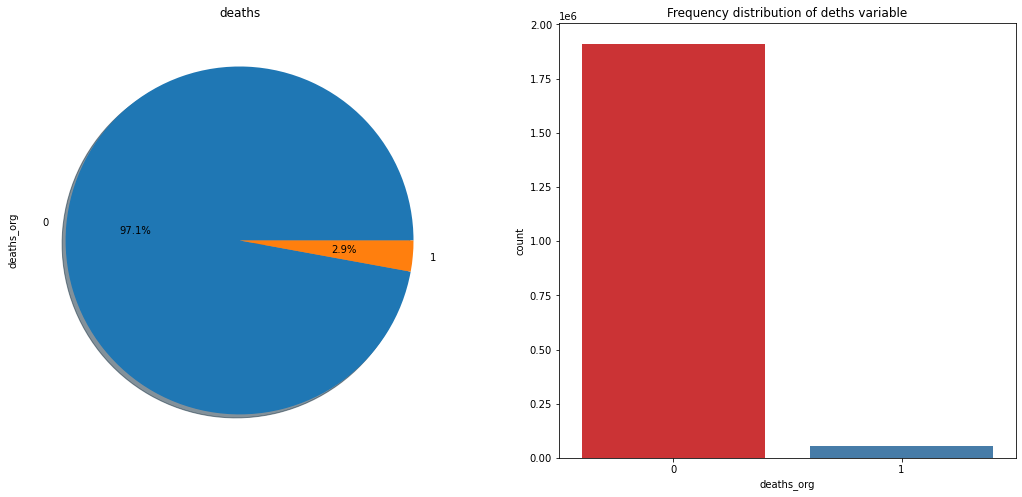

In [43]:

f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = covid['deaths_org'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('deaths')

ax[1] = sns.countplot(x="deaths_org", data=covid, palette="Set1")
ax[1].set_title("Frequency distribution of deths variable")

plt.show()

In [44]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1967736 entries, 0 to 1967735
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   state_org       object
 1   county_org      object
 2   age_group_org   int64 
 3   gender_org      object
 4   date_org        object
 5   cases_org       int64 
 6   deaths_org      int64 
 7   recovered_org   int64 
 8   county_cod_org  int64 
 9   state_cod_org   int64 
dtypes: int64(6), object(4)
memory usage: 150.1+ MB


In [22]:
covid.drop(['cases_org', 'recovered_org'], axis=1, inplace=True)

In [45]:
le3=LabelEncoder()
le3.fit(covid['gender_org'])
covid['geschlecht_org']=le3.transform(covid['gender_org'])
covid['date_org'] = pd.to_datetime(covid['date_org'])
covid['date_org'] = covid[['date_org']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)

In [46]:
covid.isnull().sum()

state_org         0
county_org        0
age_group_org     0
gender_org        0
date_org          0
cases_org         0
deaths_org        0
recovered_org     0
county_cod_org    0
state_cod_org     0
geschlecht_org    0
dtype: int64

In [47]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
covid[["scaled_date","scaled_age","scaled_gender","scaled_county","scaled_state"]] = min_max_scaler.fit_transform(covid[["date_org","age_group_org","geschlecht_org","county_cod_org","state_cod_org"]])

In [48]:
covid.drop(['county_cod_org','state_cod_org','geschlecht_org'], axis=1, inplace=True)

In [49]:
covid_feature= pd.DataFrame(covid,columns=['scaled_age', 'scaled_state','scaled_county','deaths_org','scaled_date','scaled_gender'])

In [50]:
covid

,state_org,county_org,age_group_org,gender_org,date_org,cases_org,deaths_org,recovered_org,scaled_date,scaled_age,scaled_gender,scaled_county,scaled_state
0,Mecklenburg-Vorpommern,LK Mecklenburgische Seenplatte,70,F,1608076800,8,1,0,0.888041,0.772727,0.0,0.024331,0.0
1,Mecklenburg-Vorpommern,LK Mecklenburgische Seenplatte,70,F,1608076800,8,0,1,0.888041,0.772727,0.0,0.024331,0.0
2,Mecklenburg-Vorpommern,LK Mecklenburgische Seenplatte,70,F,1608076800,8,0,1,0.888041,0.772727,0.0,0.024331,0.0
3,Mecklenburg-Vorpommern,LK Mecklenburgische Seenplatte,70,F,1608076800,8,0,1,0.888041,0.772727,0.0,0.024331,0.0
4,Mecklenburg-Vorpommern,LK Mecklenburgische Seenplatte,70,F,1608076800,8,0,1,0.888041,0.772727,0.0,0.024331,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967731,Berlin,SK Berlin Pankow,90,F,1609804800,23,0,1,0.938931,1.000000,0.0,0.980535,1.0
1967732,Berlin,SK Berlin Pankow,90,F,1609804800,23,0,1,0.938931,1.000000,0.0,0.980535,1.0
1967733,Berlin,SK Berlin Pankow,90,F,1609804800,23,0,1,0.938931,1.000000,0.0,0.980535,1.0
1967734,Berlin,SK Berlin Neukoelln,2,M,1604188800,2,0,1,0.773537,0.000000,1.0,1.000000,1.0


# RandomForestClassifier mit dem Imbalanced-Datensatz 

In [62]:
covid.head(1)

,state_org,county_org,age_group_org,gender_org,date_org,cases_org,deaths_org,recovered_org,density_county_org,density_state_org,scaled_age,scaled_date,scaled_gender,scaled_county,scaled_state
0,Mecklenburg-Vorpommern,LK Mecklenburgische Seenplatte,70,F,1608076800,8,1,0,47,69,1.0,0.411765,0.0,-1.236453,-1.5


Accuracy of test_data:  0.9653876333004021
Accuracy of train_data:  0.9786997171707316
*** Evaluation metrics for test dataset ***

Recall Score:  0.13171211695248805
Precision Score:  0.2862379715900412
F1 Score:  0.18040914560770158
Accuracy:  0.9653876333004021


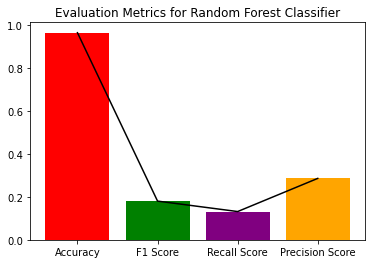


	Table 3

         deaths_org  pred
834693            1     1
1759959           0     0
411293            0     0
491953            0     0
1195763           0     0
('Model roc score:', 56.00000000000001)
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    477706
           1       0.29      0.13      0.18     14228

    accuracy                           0.97    491934
   macro avg       0.63      0.56      0.58    491934
weighted avg       0.95      0.97      0.96    491934

matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
feature_importances:  
 scaled_date      0.379286
scaled_county    0.327900
scaled_age       0.237575
scaled_state     0.039589
scaled_gender    0.015650
dtype: float64
('Model roc score:', 56.00000000000001)


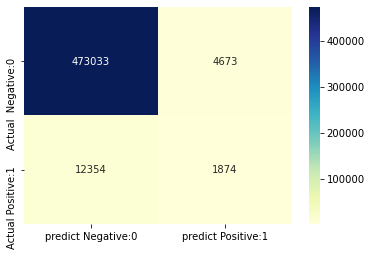

,Pred 0(recovered),Pred 1(deaths)
True 0(recovered),TN = 473033 (TNR = 99.02%),FP = 4673 (FPR = 0.98%)
True 1(deaths),FN = 12354 (FNR = 86.83%),TP = 1874 (TPR = 13.17%)


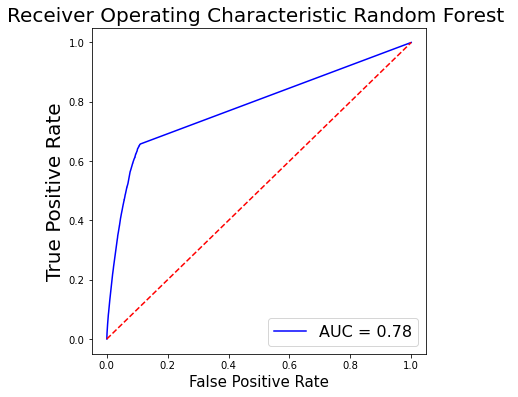

In [51]:
y = covid.deaths_org
X = covid.drop(['deaths_org'],axis=1)
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=X_test_input.drop(['state_org','county_org','date_org','age_group_org','gender_org','cases_org', 'recovered_org'], axis=1)
X_train=X_train_input.drop(['state_org','county_org','date_org','age_group_org','gender_org','cases_org', 'recovered_org'], axis=1)


rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

pred = np.array(rfc.predict(X_test))
pred_train = np.array(rfc.predict(X_train))
print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train, pred_train))

recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = rfc.score(X_test,y_test)
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= rfc.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('feature_importances:  \n',feature_scores)
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
plt.show()
fig, ax = plt.subplots(figsize = (6,6))
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)
conf_matrix(y_test,pred)

In [53]:
X_test_input.head(1)

,state_org,county_org,age_group_org,gender_org,date_org,cases_org,recovered_org,scaled_date,scaled_age,scaled_gender,scaled_county,scaled_state
834693,Sachsen,SK Dresden,70,M,1584662400,3,0,0.198473,0.772727,1.0,0.900243,0.533333


In [54]:
X_testdf= pd.DataFrame(X_test_input,columns=['age_group_org', 'state_org','county_org','gender_org','date_org','recovered_org','cases_org'])
y_testdf= pd.DataFrame(y_test,columns=['deaths_org'])
predictionsdf= pd.DataFrame(pred,columns=['predictions_deaths'])
testdata=[X_testdf,y_testdf,predictionsdf]
X_testdf.reset_index(drop=True, inplace=True)
y_testdf.reset_index(drop=True, inplace=True)
predictionsdf.reset_index(drop=True, inplace=True)
testdatadf=pd.concat(testdata,axis=1)

In [55]:
testdatadf.head(1)

,age_group_org,state_org,county_org,gender_org,date_org,recovered_org,cases_org,deaths_org,predictions_deaths
0,70,Sachsen,SK Dresden,M,1584662400,0,3,1,1


In [56]:
testdatadf.columns = ['age_group_test','state_test','county_test','gender_test','date_test','recovered_test','cases_org','deaths_test','predictions_deaths_test']

In [57]:
testdatadf

,age_group_test,state_test,county_test,gender_test,date_test,recovered_test,cases_org,deaths_test,predictions_deaths_test
0,70,Sachsen,SK Dresden,M,1584662400,0,3,1,1
1,24,Nordrhein-Westfalen,LK Warendorf,F,1603929600,1,7,0,0
2,24,Bayern,SK Muenchen,F,1602806400,1,34,0,0
3,47,Bayern,LK Aschaffenburg,M,1584921600,1,4,0,0
4,70,Baden-Wuerttemberg,LK Esslingen,F,1608854400,1,9,0,0
...,...,...,...,...,...,...,...,...,...
491929,24,Bayern,LK Roth,M,1606003200,1,4,0,0
491930,70,Nordrhein-Westfalen,LK Mettmann,M,1608163200,1,18,0,0
491931,24,Nordrhein-Westfalen,LK Lippe,M,1602288000,1,15,0,0
491932,70,Hessen,SK Frankfurt am Main,F,1604102400,1,13,0,0


In [58]:
testdatadf.to_csv('dataimtestdeuschland.csv',index=False)

# Datensatz ist unbalanced Datei , deswegen werden verschiedene Resampling-Methode untersucht und verglichen

# Ausführung RFC mit RandomUnderSampler 

Accuracy of test_data:  0.8250090459289254
Accuracy of train_data:  0.965220987946112
Recall: 0.860
********************** Evaluation metrics for test dataset **************************

('Model roc score:', 84.0)
              precision    recall  f1-score   support

           0       0.99      0.82      0.90    477706
           1       0.13      0.86      0.22     14228

    accuracy                           0.83    491934
   macro avg       0.56      0.84      0.56    491934
weighted avg       0.97      0.83      0.88    491934

Recall Score:  0.8597132414956424
Precision Score:  0.12699335548172758
F1 Score:  0.22129753591200202
Accuracy:  0.8250090459289254


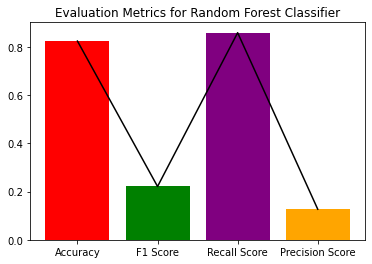


	Table 3

         deaths_org  pred
834693            1     1
1759959           0     0
411293            0     0
491953            0     0
1195763           0     0
matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
********************************* feature importances**************************


feature_importances:  
 scaled_age       0.634524
scaled_county    0.221316
scaled_date      0.137171
scaled_gender    0.006990
dtype: float64
******************************** confusion matrix *****************************




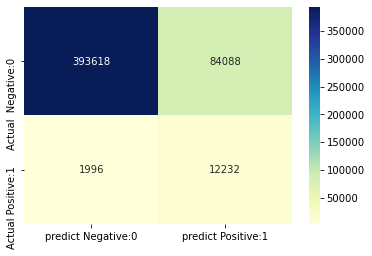

,Pred 0(recovered),Pred 1(deaths)
True 0(recovered),TN = 393618 (TNR = 82.40%),FP = 84088 (FPR = 17.60%)
True 1(deaths),FN = 1996 (FNR = 14.03%),TP = 12232 (TPR = 85.97%)


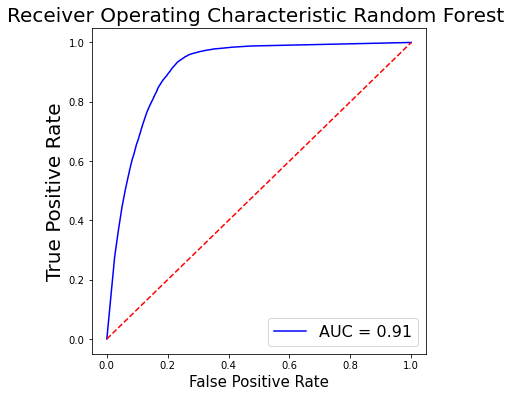

In [166]:
rus =RandomUnderSampler()
rfc = RandomForestClassifier()
y = covid.deaths_org
X = covid.drop(['deaths_org'],axis=1)
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=X_test_input.drop(['state_org','county_org','date_org','age_group_org','gender_org','cases_org', 'recovered_org'], axis=1)
X_train=X_train_input.drop(['state_org','county_org','date_org','age_group_org','gender_org','cases_org', 'recovered_org'], axis=1)

X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)
rfc.fit(X_train_rus, y_train_rus)
pred = np.array(rfc.predict(X_test))
pred_train = np.array(rfc.predict(X_train_rus))
print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train_rus, pred_train))
print("Recall: {0:.3f}".format(recall_score(y_test, pred)))

print('********************** Evaluation metrics for test dataset **************************\n')
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)

pred = np.array(rfc.predict(X_test))
recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = rfc.score(X_test,y_test)
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= rfc.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('********************************* feature importances**************************\n\n')
print('feature_importances:  \n',feature_scores)
print('******************************** confusion matrix *****************************\n\n')
plt.show()

fig, ax = plt.subplots(figsize = (6,6))
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)
ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)

conf_matrix(y_test,pred)

# Mithilfe der Funktion wird das beste Model, bzw beste Accuracy identifiziert

In [167]:
param_grid = {
        'max_depth': [5, 10, 15],
        'min_samples_split': [10, 20, 30],
        'n_estimators': [10, 20, 30],
        'min_samples_leaf': [5, 10, 15],
        'n_jobs': [4],
        "bootstrap": [True],
        "criterion": ["entropy"]
    }
grid = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                    param_grid=param_grid,
                    scoring="accuracy",
                    cv=10)
grid.fit(X_train_rus, y_train_rus)
print(f"Best Score: {grid.best_score_}, Param: {grid.best_params_}")


Best Score: 0.8751004490664146, Param: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 10, 'n_estimators': 20, 'n_jobs': 4}


# Es gibt Overfitting, Hyperparameter werden geändert 

Accuracy of test_data:  0.8000483804738034
Accuracy of train_data:  0.8772039706925077
Recall: 0.948
********************** Evaluation metrics for test dataset **************************

('Model roc score:', 87.0)
              precision    recall  f1-score   support

           0       1.00      0.80      0.89    477706
           1       0.12      0.95      0.22     14228

    accuracy                           0.80    491934
   macro avg       0.56      0.87      0.55    491934
weighted avg       0.97      0.80      0.87    491934

Recall Score:  0.9484818667416363
Precision Score:  0.12143982002249719
F1 Score:  0.21531195902770575
Accuracy:  0.8000483804738034


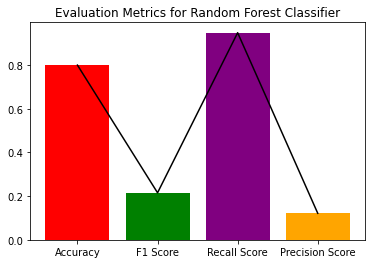


	Table 3

         deaths_org  pred
834693            1     1
1759959           0     0
411293            0     0
491953            0     0
1195763           0     1
matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
********************************* feature importances**************************


feature_importances:  
 scaled_age       0.920636
scaled_date      0.045724
scaled_county    0.014148
scaled_gender    0.012770
scaled_state     0.006721
dtype: float64
******************************** confusion matrix *****************************




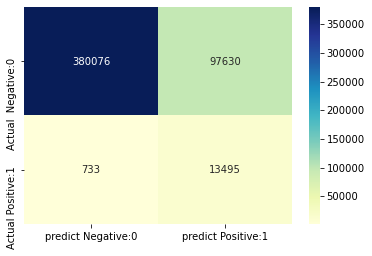

,Pred 0(recovered),Pred 1(deaths)
True 0(recovered),TN = 380076 (TNR = 79.56%),FP = 97630 (FPR = 20.44%)
True 1(deaths),FN = 733 (FNR = 5.15%),TP = 13495 (TPR = 94.85%)


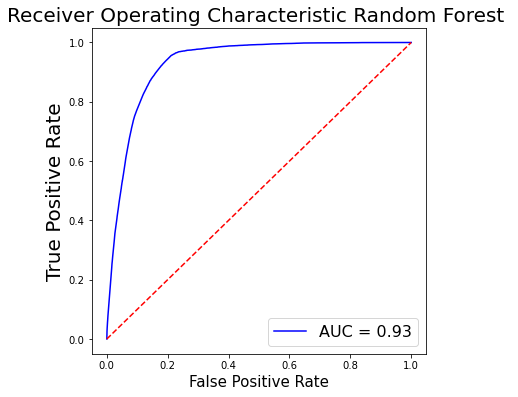

In [59]:
rus =RandomUnderSampler()
rfc = RandomForestClassifier(bootstrap= True, criterion= 'entropy', max_depth= 10, 
                             min_samples_leaf= 15, min_samples_split=10, n_estimators= 10)
y = covid.deaths_org
X = covid.drop(['deaths_org'],axis=1)
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=X_test_input.drop(['state_org','county_org','date_org','age_group_org','gender_org','cases_org', 'recovered_org'], axis=1)
X_train=X_train_input.drop(['state_org','county_org','date_org','age_group_org','gender_org','cases_org', 'recovered_org'], axis=1)

X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)
rfc.fit(X_train_rus, y_train_rus)
pred = np.array(rfc.predict(X_test))
pred_train = np.array(rfc.predict(X_train_rus))
print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train_rus, pred_train))
print("Recall: {0:.3f}".format(recall_score(y_test, pred)))

print('********************** Evaluation metrics for test dataset **************************\n')
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)

pred = np.array(rfc.predict(X_test))
recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = rfc.score(X_test,y_test)
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= rfc.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('********************************* feature importances**************************\n\n')
print('feature_importances:  \n',feature_scores)
print('******************************** confusion matrix *****************************\n\n')
plt.show()

fig, ax = plt.subplots(figsize = (6,6))
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)
ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)

conf_matrix(y_test,pred)

In [62]:
X_testdf_rus= pd.DataFrame(X_test_input,columns=['age_group_org', 'state_org','county_org','gender_org','date_org','recovered_org','cases_org'])
y_testdf_rus= pd.DataFrame(y_test,columns=['deaths_org'])
predictionsdf_rus= pd.DataFrame(pred_rus,columns=['predictions_deaths'])
testdata_rus=[X_testdf_rus,y_testdf_rus,predictionsdf_rus]
X_testdf_rus.reset_index(drop=True, inplace=True)
y_testdf_rus.reset_index(drop=True, inplace=True)
predictionsdf_rus.reset_index(drop=True, inplace=True)
testdatadf_rus=pd.concat(testdata_rus,axis=1)

In [63]:
testdatadf_rus.head(5)

,age_group_org,state_org,county_org,gender_org,date_org,recovered_org,cases_org,deaths_org,predictions_deaths
0,70,Sachsen,SK Dresden,M,1584662400,0,3,1,1
1,24,Nordrhein-Westfalen,LK Warendorf,F,1603929600,1,7,0,0
2,24,Bayern,SK Muenchen,F,1602806400,1,34,0,0
3,47,Bayern,LK Aschaffenburg,M,1584921600,1,4,0,0
4,70,Baden-Wuerttemberg,LK Esslingen,F,1608854400,1,9,0,1


In [64]:
testdatadf_rus.columns = ['age_group_test_rus','state_test_rus','county_test_rus','gender_test_rus','date_test_rus','recovered_test_rus','cases_org_rus','deaths_test_rus','predictions_deaths_test_rus']

In [65]:
testdatadf_rus.to_csv('dataimunderdeutschland.csv',index=False)

In [66]:
covid.head(1)

,state_org,county_org,age_group_org,gender_org,date_org,cases_org,deaths_org,recovered_org,scaled_date,scaled_age,scaled_gender,scaled_county,scaled_state
0,Mecklenburg-Vorpommern,LK Mecklenburgische Seenplatte,70,F,1608076800,8,1,0,0.888041,0.772727,0.0,0.024331,0.0


In [67]:
covid.drop(['scaled_state','scaled_county','scaled_gender','scaled_date','scaled_age'],axis=1,inplace=True)

In [69]:
covid

,state_org,county_org,age_group_org,gender_org,date_org,cases_org,deaths_org,recovered_org
0,Mecklenburg-Vorpommern,LK Mecklenburgische Seenplatte,70,F,1608076800,8,1,0
1,Mecklenburg-Vorpommern,LK Mecklenburgische Seenplatte,70,F,1608076800,8,0,1
2,Mecklenburg-Vorpommern,LK Mecklenburgische Seenplatte,70,F,1608076800,8,0,1
3,Mecklenburg-Vorpommern,LK Mecklenburgische Seenplatte,70,F,1608076800,8,0,1
4,Mecklenburg-Vorpommern,LK Mecklenburgische Seenplatte,70,F,1608076800,8,0,1
...,...,...,...,...,...,...,...,...
1967731,Berlin,SK Berlin Pankow,90,F,1609804800,23,0,1
1967732,Berlin,SK Berlin Pankow,90,F,1609804800,23,0,1
1967733,Berlin,SK Berlin Pankow,90,F,1609804800,23,0,1
1967734,Berlin,SK Berlin Neukoelln,2,M,1604188800,2,0,1


In [70]:
covid.to_csv('dataimorgdeutschland.csv',index=False)

In [75]:
covid.deaths_org.value_counts()

0    1911198
1      56538
Name: deaths_org, dtype: int64

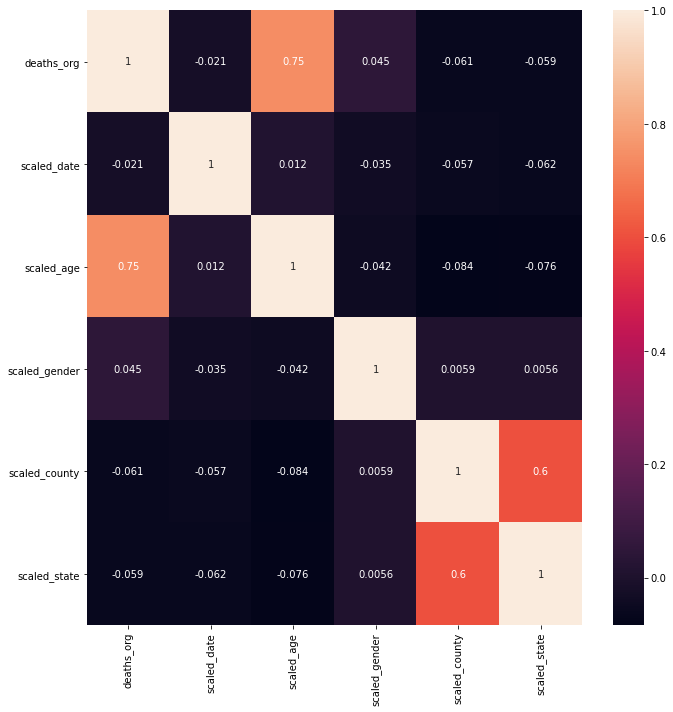

<Figure size 432x288 with 0 Axes>

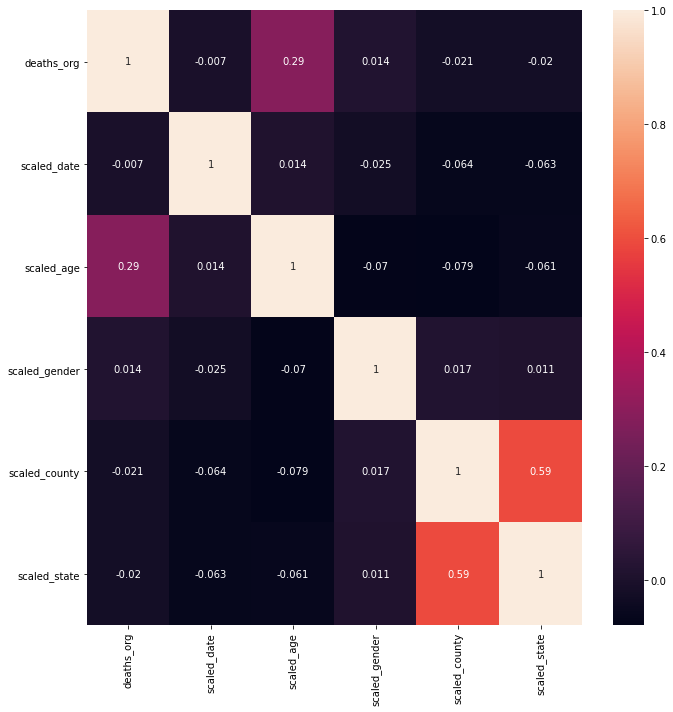

<Figure size 432x288 with 0 Axes>

In [169]:
covid = covid.sample(frac=1)

deaths_df = covid.loc[covid['deaths_org'] == 1][:56538]
recovered_df = covid.loc[covid['deaths_org'] == 0][:56538]

normal_distributed_df = pd.concat([deaths_df, recovered_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)

corr = new_df.drop(['state_org','county_org','date_org','age_group_org','gender_org'], axis=1).corr()
# Plot heatmap of correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()
corr = covid.drop(['state_org','county_org','date_org','age_group_org','gender_org'], axis=1).corr()
# Plot heatmap of correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()

In [170]:
new_df.deaths_org.value_counts()

1    56538
0    56538
Name: deaths_org, dtype: int64